## Image Classification

In [131]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [133]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [134]:
# To resize images to different resolutions change the values at line 4.

# Preparing the data set
size = (28,28) 
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    data_train = resize_images(data_train,size)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    data_test = resize_images(data_test,size)
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

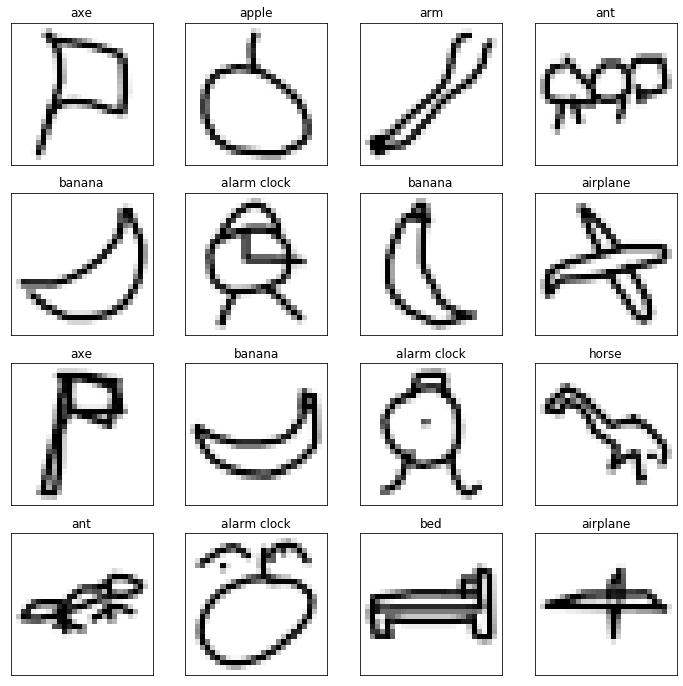

In [135]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    plt.imshow(data_train[ind,:].reshape(size),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [136]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [ ]:
# To run with different number of hidden layers, uncomment lines 6-9 accordingly.
start_time = time.time()
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1])) # Hidden Layer 1
# you can add more Dense layers here
#model.add(Dense(64, activation='relu')) # Hidden Layer 2
# model.add(Dense(10, activation='relu')) # Hidden Layer 3
# model.add(Dense(10, activation='relu')) # Hidden Layer 4
# model.add(Dense(10, activation='relu')) # Hidden Layer 5
model.add(Dense(10, activation='softmax')) # Output layer
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
plot1 = model.fit(data_train, label_train, epochs=500, validation_data = (data_test, label_test), batch_size=32)
print("--- Training time %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))
print("--- Test run time %s seconds ---" % (time.time() - start_time))

In [ ]:
plt.plot(plot1.history['accuracy'])
plt.plot(plot1.history['val_accuracy'])
plt.legend(['train', 'test'], loc = "lower right")
plt.title("")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [102]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')